# **Regression Models**
 ## Objective: 
  #### - Apply regression techniques to predict a target variable using various classical AI models. The dataset remains the same (Top 1000 IMDb Movies), but now your task is to train models to predict a selected column based on relevant features.


## **Scenario**
 ##### You are a data scientist at DaciaVision Analytics. After completing the initial data preprocessing and feature engineering phase, your team is now tasked with building predictive models to forecast a key numerical variable of interest. Your goal is to analyze different regression models and compare their performance. Your dataset: IMDb Top 1000 Movies : `imdb_top_1000_cleaned.csv`

#### In this section, we import essential libraries that will help us explore and analyze the dataset.
- `pandas` for data manipulation.
- `matplotlib`, `plotly` & `seaborn` for data visualization.
- `numpy` for numerical operations.
- `sklearn` for machine learning models and preprocessing.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

Load the **Top 1000 Movies from IMDb** cleaned dataset. Since it was worked on previously, we use `pd.read_csv()` to read it directly from its path, name of file: `imdb_top_1000_cleaned.csv`


In [3]:
df = pd.read_csv('data/imdb_top_1000_cleaned.csv')

In [4]:
df.head(10)

,Series_Title,Released_Year,Runtime,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,...,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated,Actor_Popularity,Director_Popularity
0,The Shawshank Redemption,1994.0,0.694471,1.000000,0.722222,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,...,False,False,False,False,False,False,False,False,13,2
1,The Godfather,1972.0,1.888839,0.941176,1.000000,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,...,False,False,False,False,False,False,False,False,26,5
2,The Dark Knight,2008.0,1.056401,0.823529,0.777778,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,...,False,False,False,False,False,False,True,False,23,8
3,The Godfather: Part II,1974.0,2.866049,0.823529,0.861111,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,...,False,False,False,False,False,False,False,False,40,5
4,12 Angry Men,1957.0,-0.970406,0.823529,0.944444,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,...,False,False,False,False,True,False,False,False,12,5
5,The Lord of the Rings: The Return of the King,2003.0,2.829856,0.764706,0.916667,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,...,False,False,False,False,True,False,False,False,19,5
6,Pulp Fiction,1994.0,1.128787,0.764706,0.916667,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,...,False,False,False,False,False,False,False,False,18,8
7,Schindler's List,1993.0,2.612699,0.764706,0.916667,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,...,False,False,False,False,False,False,False,False,12,13
8,Inception,2010.0,0.911629,0.705882,0.638889,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,...,False,False,False,False,False,False,True,False,20,8
9,Fight Club,1999.0,0.585892,0.705882,0.527778,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,...,False,False,False,False,False,False,False,False,21,8


In [5]:
print("Data Types:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Series_Title          1000 non-null   object 
 1   Released_Year         1000 non-null   float64
 2   Runtime               1000 non-null   float64
 3   IMDB_Rating           1000 non-null   float64
 4   Meta_score            1000 non-null   float64
 5   Director              1000 non-null   object 
 6   Star1                 1000 non-null   object 
 7   Star2                 1000 non-null   object 
 8   Star3                 1000 non-null   object 
 9   Star4                 1000 non-null   object 
 10  No_of_Votes           1000 non-null   float64
 11  Gross                 1000 non-null   float64
 12  Genre_Drama           1000 non-null   bool   
 13  Genre_Crime           1000 non-null   bool   
 14  Genre_Action          1000 non-null   bool   
 15  Genre_Adve

 # **Part 1: Selecting the Target Variable or Dependent variable**
#### First, create a correlation matrix to identify the numerical columns that are highly correlated.


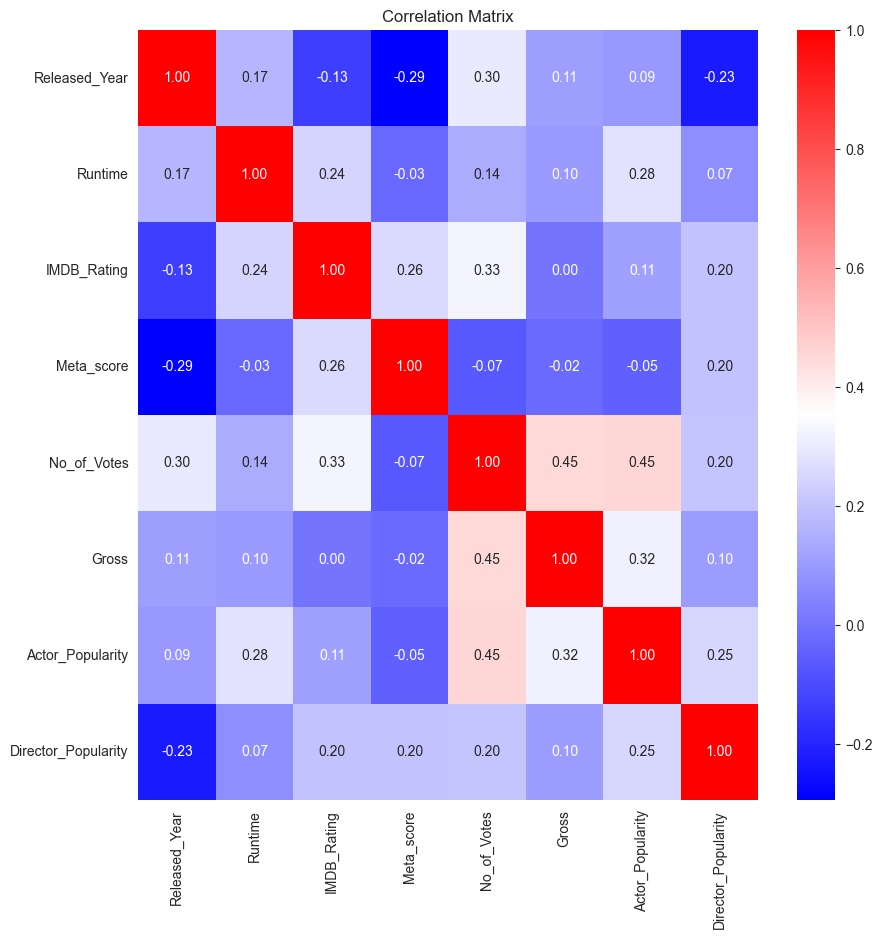

In [6]:
# Compute the correlation matrix of the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Based on the correlation matrix, I will select ***No_of_Votes*** as the Target Variable as it seems the best to predict based on available features.
   - Correlation 0.45 with `Actor_Popularity` 
   - Correlation 0.45 with `Gross`
   - Correlation 0.33 with `IMDB_Rating`
   - Correlation 0.30 with `Released_Year`
 
## Visualizing the Relationship between the Target Variable and the Features

### **No_of_Votes vs. Actor_Popularity (Scatter Plot)**
   -  This scatter plot helps visualize the relationship between the number of votes and the popularity of the actors in the movie.
   - More popular actors generally have more votes.


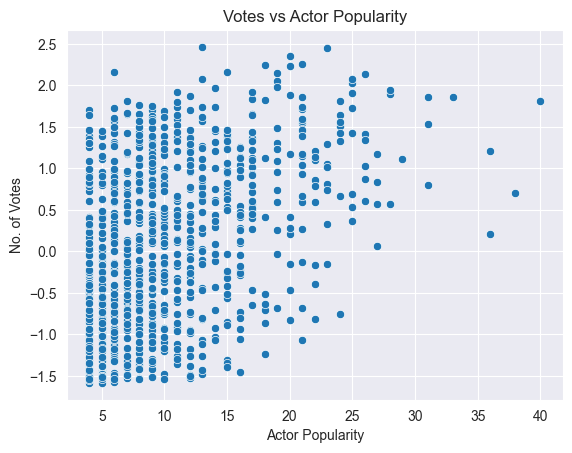

In [7]:
# Plot Actor Popularity vs No. of Votes
sns.scatterplot(x=df['Actor_Popularity'], y=df['No_of_Votes'])
plt.xlabel('Actor Popularity')
plt.ylabel('No. of Votes')
plt.title('Votes vs Actor Popularity')
plt.show()

### **Votes vs. IMDb Rating (Box Plot)**  
   - This box plot groups movies based on IMDb rating ranges and shows the distribution of votes within each group.
   - The plot confirms an upward trend in the number of votes as the IMDb rating increases.


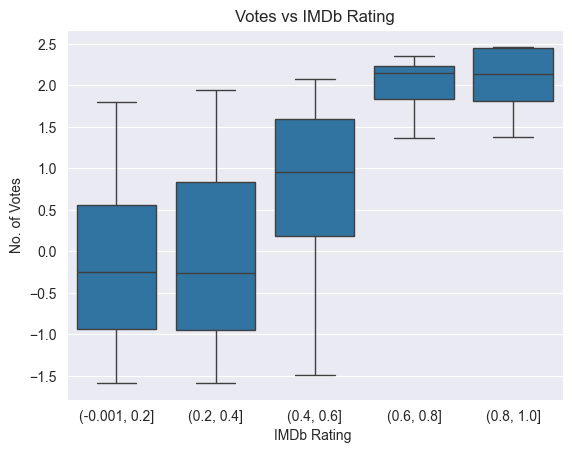

In [8]:
sns.boxplot(x=pd.cut(df['IMDB_Rating'], bins=5), y=df['No_of_Votes'])
plt.xlabel('IMDb Rating ')
plt.ylabel('No. of Votes')
plt.title('Votes vs IMDb Rating')
plt.show()


### **Votes Over Time (Line Plot)**  
   - This line plot shows the average number of votes per movie across different release years.  
   - The plot confirms an increasing trend, indicating that newer movies tend to receive more votes, likely due to the rise of online platforms and larger audiences.


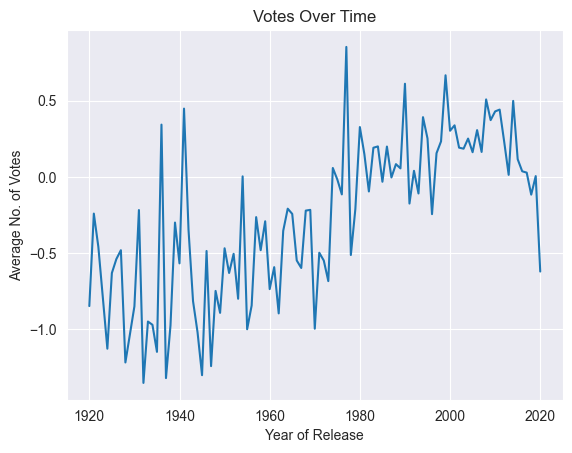

In [9]:
df.groupby('Released_Year')['No_of_Votes'].mean().plot(kind='line')
plt.xlabel('Year of Release')
plt.ylabel('Average No. of Votes')
plt.title('Votes Over Time')
plt.show()


### **Votes vs. Gross Revenue (Scatter Plot)**  
   - This scatter plot shows the relationship between a movie's gross revenue and the number of votes it receives.  
   - The plot highlights a positive correlation, where movies with higher gross revenue tend to have more votes, likely due to their wide reach and popularity.


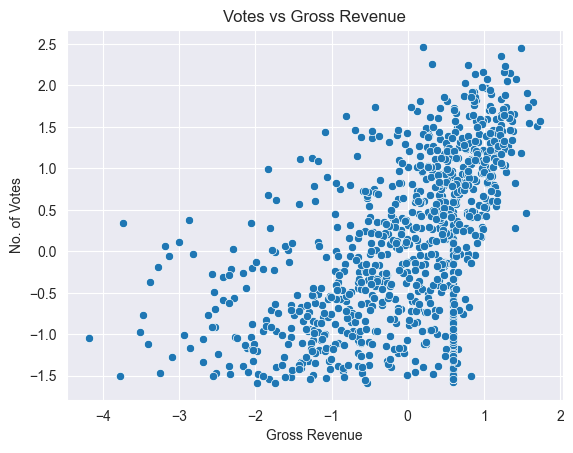

In [10]:
sns.scatterplot(x=df['Gross'], y=df['No_of_Votes'])
plt.xlabel('Gross Revenue')
plt.ylabel('No. of Votes')
plt.title('Votes vs Gross Revenue')
plt.show()


 # **Part 2: Feature Selection & Engineering**

### The Features considered to select due to previous analysis:
   - `Actor_Popularity`
   - `Gross`
   - `IMDB_Rating`
   - `Released_Year`
    

### **Feature Engineering**
#### **1**. Normalizing Released_Year
   - Released_Year is a numerical feature that can be normalized to a common scale (0-1) using MinMaxScaler.
   - This transformation helps prevent features with large values from dominating the model and ensures all features contribute more equally to the prediction.

In [11]:
scaler = MinMaxScaler()

# Apply to Released_Year feature
df['Normalized_Year'] = scaler.fit_transform(df[['Released_Year']])

# Check the first few rows to verify the transformation
df[['Released_Year', 'Normalized_Year']].head()

,Released_Year,Normalized_Year
0,1994.0,0.74
1,1972.0,0.52
2,2008.0,0.88
3,1974.0,0.54
4,1957.0,0.37


#### **2**. Adding a New Feature: `Popularity`
  - The new feature `Popularity` is created by combining the popularity of actors and directors.
  - It is better to combine these features as they are related and can provide a more comprehensive measure of the movie's overall popularity.


In [12]:
# Divide by 5 because there are 4 actors and 1 director in each movie
df['Popularity'] = (df['Actor_Popularity'] + df['Director_Popularity'])/5 

# Normalize the new feature to a common scale (0-1)
df['Popularity'] = scaler.fit_transform(df[['Popularity']])

In [13]:
df.head()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,...,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated,Actor_Popularity,Director_Popularity,Normalized_Year,Popularity
0,The Shawshank Redemption,1994.0,0.694471,1.000000,0.722222,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,...,False,False,False,False,False,False,13,2,0.74,0.232558
1,The Godfather,1972.0,1.888839,0.941176,1.000000,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,...,False,False,False,False,False,False,26,5,0.52,0.604651
2,The Dark Knight,2008.0,1.056401,0.823529,0.777778,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,...,False,False,False,False,True,False,23,8,0.88,0.604651
3,The Godfather: Part II,1974.0,2.866049,0.823529,0.861111,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,...,False,False,False,False,False,False,40,5,0.54,0.930233
4,12 Angry Men,1957.0,-0.970406,0.823529,0.944444,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,...,False,False,True,False,False,False,12,5,0.37,0.279070


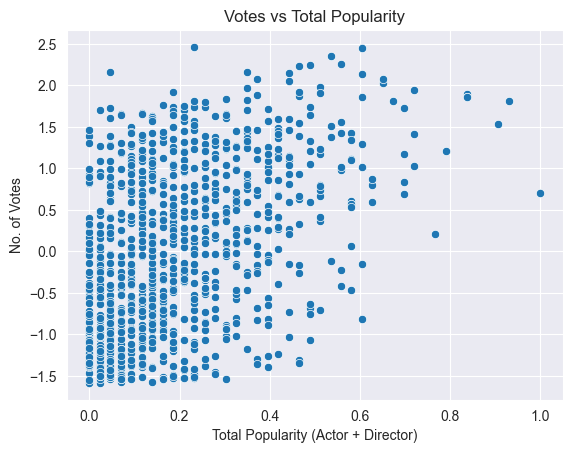

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['Popularity'], y=df['No_of_Votes'])
plt.xlabel('Total Popularity (Actor + Director)')
plt.ylabel('No. of Votes')
plt.title('Votes vs Total Popularity')
plt.show()


#### The scatter plot and the correlation > 0.45 between `Popularity` and `No_of_Votes` indicate a positive relationship.

In [15]:
# Check correlation between Total_Popularity and No_of_Votes
correlation = df[['Popularity', 'No_of_Votes']].corr()
print(correlation)


             Popularity  No_of_Votes
Popularity      1.00000      0.45368
No_of_Votes     0.45368      1.00000


### **3. Choosing the Features and Justifying the Selection**

For predicting **No_of_Votes**, the following features were chosen:

#### **1. Popularity (Actor + Director Popularity)**
   - **Rationale**: Combines the influence of actors and directors on a movie's success, which can impact the number of votes.

#### **2. IMDb_Rating**
   - **Rationale**: Movies with higher ratings generally receive more votes, making this a direct predictor of vote count.

#### **3. Released_Year**
   - **Rationale**: The year a movie was released affects its exposure time, which impacts the number of votes it collects over time.

#### **4. Gross Revenue**
   - **Rationale**: Movies with higher box office earnings tend to have more visibility, leading to a higher number of votes.

#### **Excluded Features**:
   - **Genre**: Excluded due to complexity and potential redundancy with other features like IMDb Rating.
   - **Runtime**: Excluded as it doesn't have a strong direct correlation with the number of votes.
   - **Meta_score**: Excluded due to its lower correlation with the target variable compared to other features.
   - **Certificate**: Excluded as it may not directly influence the number of votes a movie receives.



# **Part 3: Training Regression Model**
 ## Train and evaluate five different regression models:
   - Linear Regression
   - Decision Tree Regression
   - Random Forest Regression
 ## For each model:
   - Train it using the selected features.
   - Optimize hyperparameters where applicable. 
   - Evaluate its performance using relevant metrics (e.g., RMSE, MAE, R-squared).
   - Compare model performances using a table and visualization (e.g., bar chart of RMSE values)

### **RMSE (Root Mean Squared Error) Explanation**

**Root Mean Squared Error (RMSE)** is a commonly used metric to evaluate the performance of regression models. It provides a measure of the differences between the predicted values and the actual values of a model. RMSE gives you an idea of how far off the predictions are from the actual values in the same units as the target variable.

1. Calculate the difference between the predicted values and the actual values: For each data point, subtract the predicted value from the actual value. `(yi - y'i)`

2. Square the Error: 
   Squaring each error ensures that negative differences don't cancel out positive ones, and gives more weight to larger errors. `(yi - y'i)^2`


3. Average the Squared Errors: 
   Find the mean of all the squared errors. `(1/n) * Σ(yi - y'i)^2` where n is the number of data points.


4. Take the Square Root: 
   Finally, take the square root of the Mean Squared Error (MSE) to bring it back to the original units of the target variable. `RMSE = √MSE`

### **Why RMSE is Useful:**

- **Interpretability**: RMSE has the same units as the target variable, making it easy to understand and interpret.
- **Penalizes Large Errors**: Squaring the errors means larger errors have a disproportionately large impact on RMSE, which makes the metric sensitive to outliers or poor predictions.

### **How to Interpret RMSE:**

- **Lower RMSE**: A lower RMSE means that the model's predictions are closer to the actual values, indicating better model performance.
- **Higher RMSE**: A higher RMSE indicates that the predictions deviate significantly from the actual values, suggesting poor model performance.


### **R-squared (R²) Explanation**

**R-squared (R²)**, also known as the **coefficient of determination**, is a statistical metric used to assess how well a regression model fits the data. It represents the proportion of the variance in the dependent variable that is predictable from the independent variables. R² gives you an idea of how well the model explains the variability of the target variable.

1. **Calculate the Total Sum of Squares (TSS):**  
   The total sum of squares is a measure of the variance of the dependent variable, calculated as the sum of the squared differences between each observed value and the mean of the actual values.  
   `TSS = Σ(yi - y_bar)²`  
   where `yi` is the actual value and `y_bar` is the mean of the actual values.

2. **Calculate the Residual Sum of Squares (RSS):**  
   The residual sum of squares is a measure of the variance in the dependent variable that is not explained by the model. It is calculated as the sum of the squared differences between the actual values and the predicted values.  
   `RSS = Σ(yi - y'i)²`  
   where `yi` is the actual value and `y'i` is the predicted value.

3. **Calculate R-squared (R²):**  
   R-squared is calculated as:  
   `R² = 1 - (RSS / TSS)`  
   This formula represents the proportion of the variance in the target variable that is explained by the model.

### **Why R-squared is Useful:**

- **Explained Variance:** R² tells you how much of the variance in the target variable is explained by the model.
- **Goodness of Fit:** A higher R² value means the model does a better job of fitting the data. It indicates how well the independent variables predict the dependent variable.

### **How to Interpret R-squared:**

- **R² = 1:** Perfect fit. The model explains all the variance in the data.
- **R² = 0:** No fit. The model does not explain any of the variance in the data.
- **R² < 0:** The model is worse than a simple horizontal line that predicts the mean of the target variable for all instances.

R² is often used to evaluate how well a model has performed, but be cautious as it can be misleading in some cases, especially when the model is overfitting or when comparing models with different complexities.


### Divide the data into Training and Testing Sets

In [16]:
# Select the features and target variable
X = df[['Popularity', 'IMDB_Rating', 'Normalized_Year', 'Gross']]
Y = df['No_of_Votes']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


### **1. Linear Regression**

#### Idea
  - The goal is to find the best-fitting line that minimizes the difference between predicted and actual values.
  - Given n data points, we assume a linear relationship between the features and target variable. Ex: y = w0 + w1\*X1 + w2\*X2 + ... + wn\*Xn + error (y - dependent variable, x - independent variables, w - weights)
  - The model learns the weights (w) that minimize the error between predicted and actual values by using 



In [47]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, Y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)



### **Linear Regression Model Evaluation**

- **RMSE (Root Mean Squared Error)**: 0.69
   - The model has a decent RMSE of 0.69 votes off from the actual values, considering the votes span a 3.5 range.
   - So that would mean around 20% error, which is not bad.

- **R² (R-squared)**: 0.55
   - About 55% of the variance in the target variable (`No_of_Votes`) is explained by the model.
   - Over half of the variance is captured, indicating a moderate fit for the model.


In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
rmse_linear = np.sqrt(mean_squared_error(Y_test, y_pred_linear))
r2_linear = r2_score(Y_test, y_pred_linear)

# Print performance metrics
print(f"Linear Regression - RMSE: {rmse_linear:.2f}")
print(f"Linear Regression - R2: {r2_linear:.2f}")

Linear Regression - RMSE: 0.69
Linear Regression - R2: 0.55


### **Linear Regression: Actual vs Predicted**

- The scatter plot compares the actual vs. predicted values for the Linear Regression model.
- The blue dashed line represents a perfect prediction where the actual values equal the predicted values.
- The closer the scatter points are to the dashed line, the better the model's predictions. If the points are spread widely, it indicates the model's predictions are not accurate.
- A tight clustering of points along the line suggests good performance, whereas significant deviation indicates errors in the predictions.


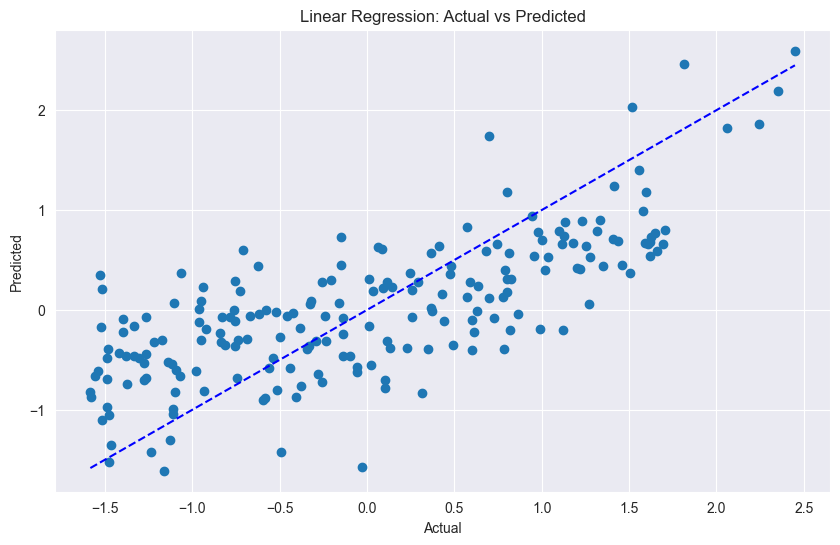

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred_linear)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'b--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


## **2. Decision Tree Regression**

#### Idea
   - Decision Trees split the data into subsets based on the features to predict the target variable.
   - The tree structure is built by recursively splitting the data based on the feature that best separates the target variable.
   - The model predicts the target variable by averaging the values of the training instances in the leaf node.

In [50]:
# Initialize Decision Tree model
dt_model = DecisionTreeRegressor(criterion='squared_error', random_state=1)

# Train the model
dt_model.fit(X_train, Y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 3, 5, 7, 10, 15],
    'min_samples_leaf': [1, 2, 4, 5, 10, 30]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid)

# Fit Grid Search
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_dt_model = DecisionTreeRegressor(**best_params, random_state=1)
best_dt_model.fit(X_train, Y_train)

# Predict on the test set
y_pred_best_dt = best_dt_model.predict(X_test)


### **Decision Tree Regression Model Evaluation**
   - Had to search for better hyperparameters to improve the model's performance.
   - The bad performance of the initial model is due to overfitting, which is common in Decision Trees. Deep trees can memorize the training data, leading to poor generalization on unseen data if not pruned (limited max depth or min samples per leaf).
  


In [51]:
# Evaluate the model
rmse_dt = np.sqrt(mean_squared_error(Y_test, y_pred_dt))
r2_dt = r2_score(Y_test, y_pred_dt)

rmse_improved_dt = np.sqrt(mean_squared_error(Y_test, y_pred_best_dt))
r2_improved_dt = r2_score(Y_test, y_pred_best_dt)

# Print performance metrics
print(f"Decision Tree Regression - RMSE: {rmse_dt:.2f}")
print(f"Decision Tree Regression - R2: {r2_dt:.2f}")

print(f"Improved Decision Tree Regression - RMSE: {rmse_improved_dt:.2f}")
print(f"Improved Decision Tree Regression - R2: {r2_improved_dt:.2f}")

Decision Tree Regression - RMSE: 0.81
Decision Tree Regression - R2: 0.37
Improved Decision Tree Regression - RMSE: 0.60
Improved Decision Tree Regression - R2: 0.65


### **Decision Tree Regression: Actual vs Predicted**


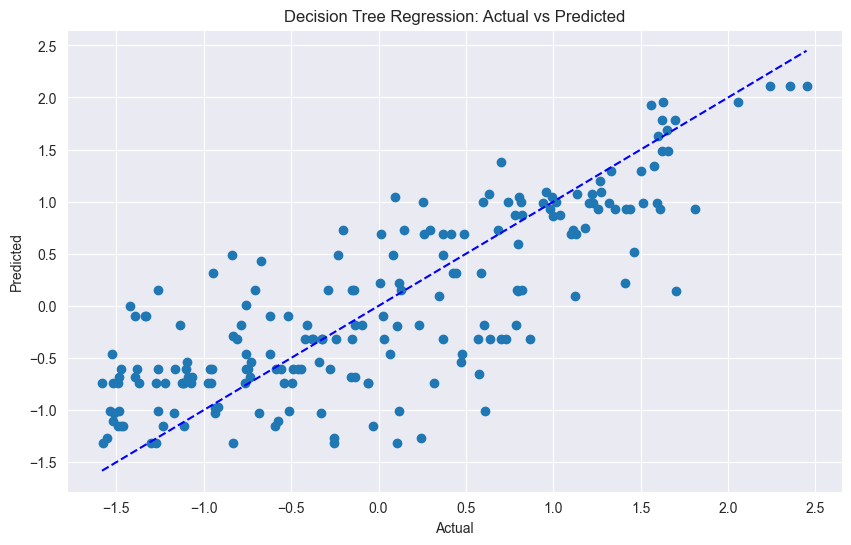

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred_best_dt)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'b--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.show()


## **3. Random Forest Regression**
#### Idea
   - Random Forest is an ensemble learning method that combines multiple decision trees to improve the model's performance.
   - It builds multiple decision trees and averages their predictions to reduce overfitting and improve accuracy.
   - Random Forest can handle a large number of features and is robust to outliers and noise in the data.
   - It uses Bootstrap Sampling (Data Sampling) to generate multiple subsets of the data and trains a decision tree on each subset.
   - Does not consider all features at each split, it randomly selects a subset of features to split the node. (determined by max_features parameter)

In [71]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=1)

rf_model.fit(X_train, Y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1, 2, 3, None]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid)

grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=1)
best_rf_model.fit(X_train, Y_train)

y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model
rmse_best_rf = np.sqrt(mean_squared_error(Y_test, y_pred_best_rf))
r2_best_rf = r2_score(Y_test, y_pred_best_rf)


### **Random Forest Regression Model Evaluation**
 - Tried to improve the model by searching for better hyperparameters, but the initial model performed well enough (n_estimators=100, max_depth=None, min_samples_leaf=1). 
 - A RMSE of 0.52, considering the target variable's range is 3.5, is around a 15% error.

In [72]:
# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(Y_test, y_pred_rf))
r2_rf = r2_score(Y_test, y_pred_rf)

rmse_improved_rf = np.sqrt(mean_squared_error(Y_test, y_pred_best_rf))
r2_improved_rf = r2_score(Y_test, y_pred_best_rf)

print(f"Random Forest Regression - RMSE: {rmse_rf:.2f}")
print(f"Random Forest Regression - R2: {r2_rf:.2f}")

print(f"Improved Random Forest Regression - RMSE: {rmse_improved_rf:.2f}")
print(f"Improved Random Forest Regression - R2: {r2_improved_rf:.2f}")

Random Forest Regression - RMSE: 0.53
Random Forest Regression - R2: 0.73
Improved Random Forest Regression - RMSE: 0.52
Improved Random Forest Regression - R2: 0.74


### **Random Forest Regression: Actual vs Predicted**

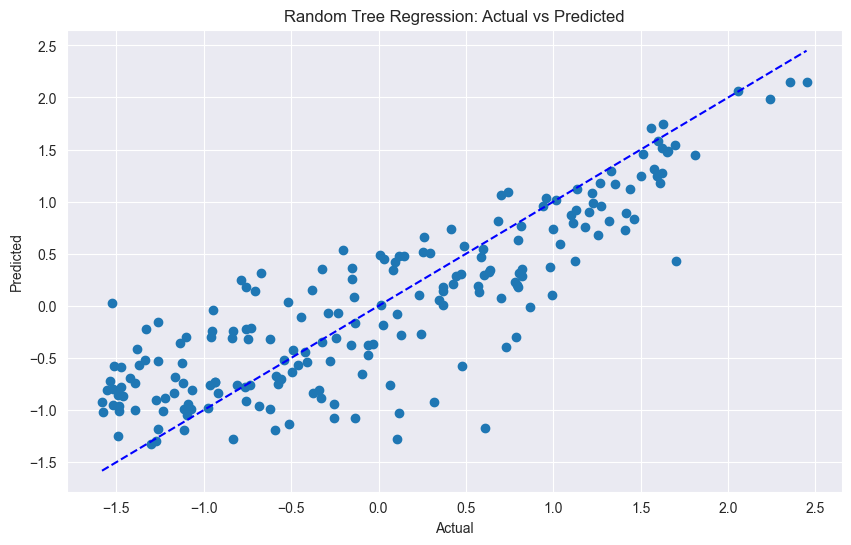

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred_rf)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'b--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Tree Regression: Actual vs Predicted')
plt.show()

# **Part 4: Model Interpretation & Insights**

## **Performance data interpretation**
 - Decision Tree Regression has a sligthly better RMSE and R² compared to Linear Regression.
 - Decision Trees can capture non-linear relationships between features and the target variable, which is beneficial if the relationship is not linear.
 - The Random Forest has a lower RMSE and higher R² compared to the Decision Tree models. Which is expected as Random Forest is an ensemble of Decision Trees that reduces overfitting and improves accuracy.


In [25]:
# Create a DataFrame to store the performance metrics
performance_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Improved Decision Tree', 'Random Forest', 'Improved Random Forest'],
    'RMSE': [rmse_linear, rmse_dt, rmse_improved_dt, rmse_rf, rmse_improved_rf],
    'R²': [r2_linear, r2_dt, r2_improved_dt, r2_rf, r2_improved_rf]
}

performance_df = pd.DataFrame(performance_data)

print(performance_df)

                    Model      RMSE        R²
0       Linear Regression  0.688566  0.545377
1           Decision Tree  0.813263  0.365806
2  Improved Decision Tree  0.602413  0.652025
3           Random Forest  0.533455  0.727130
4  Improved Random Forest  0.524500  0.736214


## **Bar chart for visualization of RMSE results for each Regression type tested**

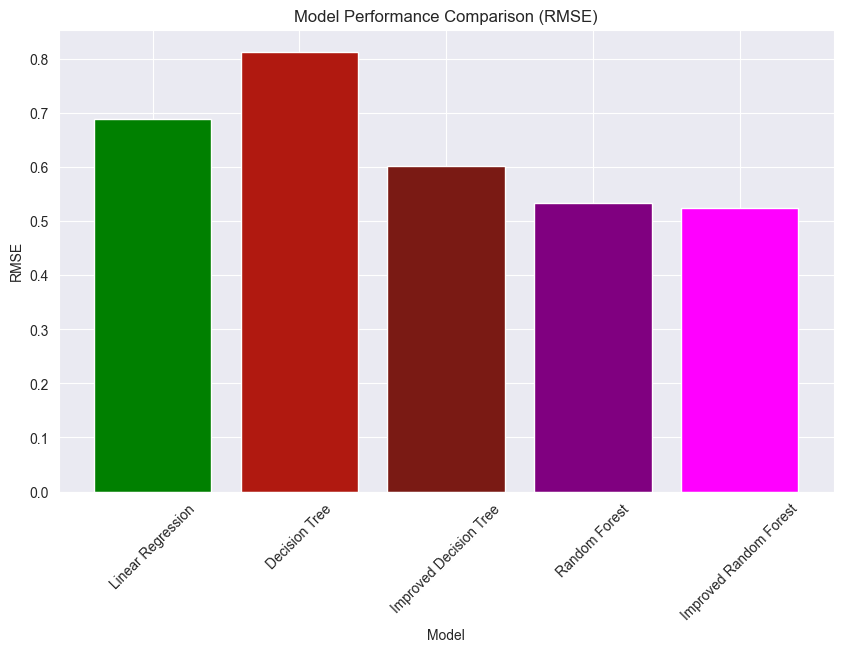

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(performance_df['Model'], performance_df['RMSE'], color=['green', '#b01910', '#7a1a14', 'purple', 'magenta'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison (RMSE)')
plt.xticks(rotation=45)
plt.show()

## **Plot of RMSE + R² values** 
   - For my tests when RMSE got smaller the R² got bigger, so better Regression Models resulted in improvements on both variation estimation and actual prediciton.

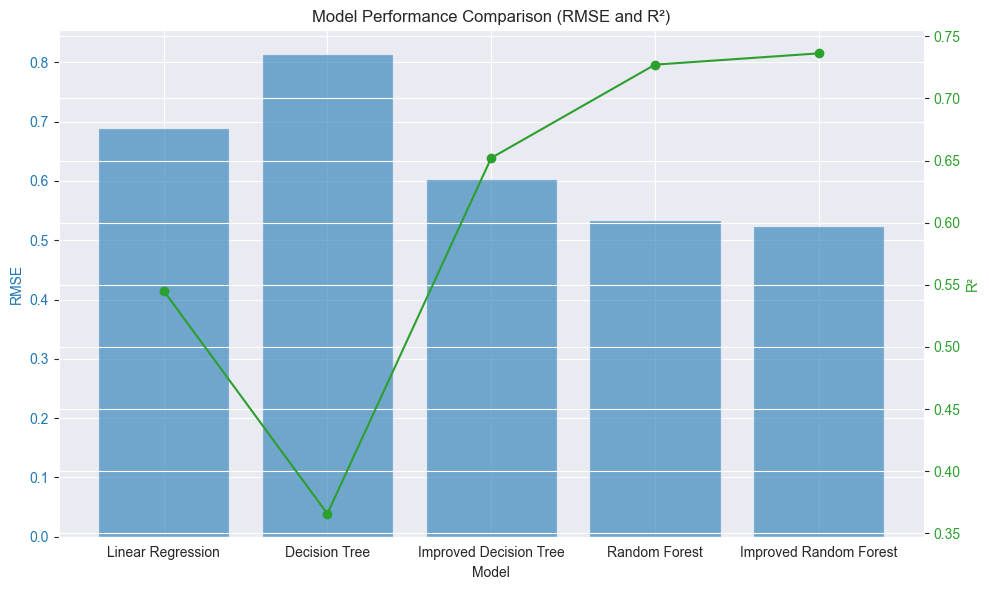

In [27]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE', color='tab:blue')
ax1.bar(performance_df['Model'], performance_df['RMSE'], color='tab:blue', alpha=0.6, label='RMSE')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('R²', color='tab:green')
ax2.plot(performance_df['Model'], performance_df['R²'], color='tab:green', marker='o', label='R²')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Model Performance Comparison (RMSE and R²)')
fig.tight_layout()
plt.show()

 ### **Suggest potential improvements** 
 
   - **Feature Engineering**: Create more feature combinations, explore interactions between features. (Ex: Genre popularity)
   - **Non-linear Models**: Use models like Polynomial Regression to capture non-linear relationships. (capture curves or exponential trends)


# **Bonus**
-  #### Implement Cross-Validation to ensure model robustness.
 - #### Use ensemble techniques (e.g., averaging multiple models) to improve prediction accuracy

## **Cross-Validation**
  - Cross-validation is a technique used to assess the performance and generalization of a model.
  - It helps evaluate how well the model will perform on unseen data by training and testing the model on different subsets of the data.
  - Used 5-fold cross-validation to evaluate the Random Forest model's performance (best performing model).
  - Also performed cross-validation on the Linear Regression model to compare the results.

In [68]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the Random Forest model
cv_scores = cross_val_score(best_rf_model, X, Y, cv=5)
cv_rmse = np.sqrt(cv_scores)

# Perform 5-fold cross-validation on the Linear Regression model
cv_scores_lin = cross_val_score(linear_model, X, Y, cv=5)
cv_rmse_lin = np.sqrt(cv_scores_lin)

print("| Model | Fold 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5 | Mean RMSE |")
print("|-------|--------|--------|--------|--------|--------|-----------|")
print(f"| Random Forest | {cv_rmse[0]:.2f} | {cv_rmse[1]:.2f} | {cv_rmse[2]:.2f} | {cv_rmse[3]:.2f} | {cv_rmse[4]:.2f} | {cv_rmse.mean():.2f} |")
print(f"| Linear Regression | {cv_rmse_lin[0]:.2f} | {cv_rmse_lin[1]:.2f} | {cv_rmse_lin[2]:.2f} | {cv_rmse_lin[3]:.2f} | {cv_rmse_lin[4]:.2f} | {cv_rmse_lin.mean():.2f} |")

| Model | Fold 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5 | Mean RMSE |
|-------|--------|--------|--------|--------|--------|-----------|
| Random Forest | 0.63 | 0.81 | 0.76 | 0.85 | 0.76 | 0.76 |
| Linear Regression | 0.50 | 0.67 | 0.61 | 0.67 | 0.57 | 0.61 |


## Comparison of Cross-Validation Results
   - The Random Forest model has a lower RMSE compared to the Linear model in all folds. (expected)
   - Shows that Random Forest model is more robust and generalizes better to unseen data compared to the Linear one.
   - Fold 1 had the highest RMSE for both models, indicating that the data in that fold might be more challenging to predict.


| Model | Fold 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5 | Mean RMSE |
|-------|--------|--------|--------|--------|--------|-----------|
| Random Forest | 0.63 | 0.81 | 0.76 | 0.85 | 0.76 | 0.76 |
| Linear Regression | 0.50 | 0.67 | 0.61 | 0.67 | 0.57 | 0.61 |

## **Ensemble techniques**
  - ### Averaging Multiple Models
    - Average the predictions of multiple models to improve prediction accuracy.
    - Combined the predictions of Linear Regression, Decision Tree, and Random Forest models to create an ensemble model.
        
### **Ensemble Model Performance**
  - Got similar values to the Random Forest model, which was the best performing model.
  - More reliable predictions by combining the strengths of different models.
  - Reduced the impact of individual model weaknesses or biases.
   

In [67]:
ensemble_pred = (y_pred_linear + y_pred_best_dt + y_pred_best_rf) / 3

# Evaluate the ensemble model
rmse_ensemble = np.sqrt(mean_squared_error(Y_test, ensemble_pred))
r2_ensemble = r2_score(Y_test, ensemble_pred)

# Print performance metrics
print(f"Ensemble Model - RMSE: {rmse_ensemble:.2f}")
print(f"Ensemble Model - R2: {r2_ensemble:.2f}")

Ensemble Model - RMSE: 0.53
Ensemble Model - R2: 0.73
